<a href="https://colab.research.google.com/github/yumkim1016/TP1/blob/main/binary_minmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [10]:
df = pd.read_csv('binary_minmax.csv') 

### 2. Feature importance / heatmap

In [11]:
# Feature Importance

features = df.drop('target_class', axis=1)
target = df['target_class']

# 랜덤 포레스트 분류기 모델 생성
rf = RandomForestClassifier(random_state=42)
rf.fit(features, target)

# Feature importance 계산
importances = rf.feature_importances_

# 결과 출력
for feature, importance in zip(features.columns, importances):
    print(f'{feature}: {importance}')

 Mean of the integrated profile: 0.15954510725127297
 Standard deviation of the integrated profile: 0.041171245949224354
 Excess kurtosis of the integrated profile: 0.3894253388683342
 Skewness of the integrated profile: 0.19366839439999994
 Mean of the DM-SNR curve: 0.07103891839780663
 Standard deviation of the DM-SNR curve: 0.06388527616468094
 Excess kurtosis of the DM-SNR curve: 0.038553671963018274
 Skewness of the DM-SNR curve: 0.04271204700566256


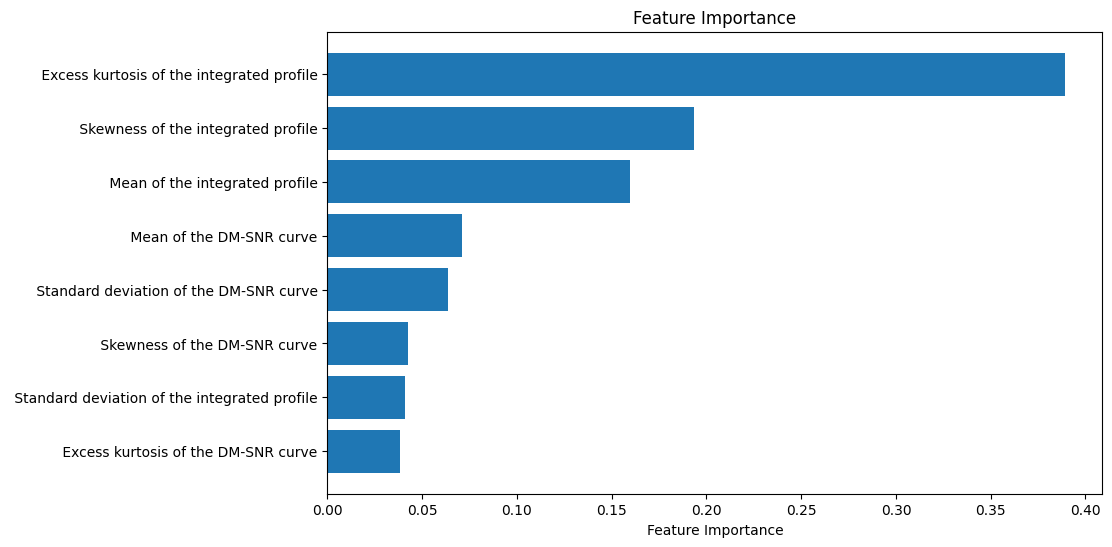

In [12]:
# bar plot으로 결과 시각화, 높은순서대로 표시

feature_names = features.columns
sorted_indices = np.argsort(importances)
pos = np.arange(sorted_indices.shape[0]) + 0.5

plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_indices], align='center')
plt.yticks(pos, feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

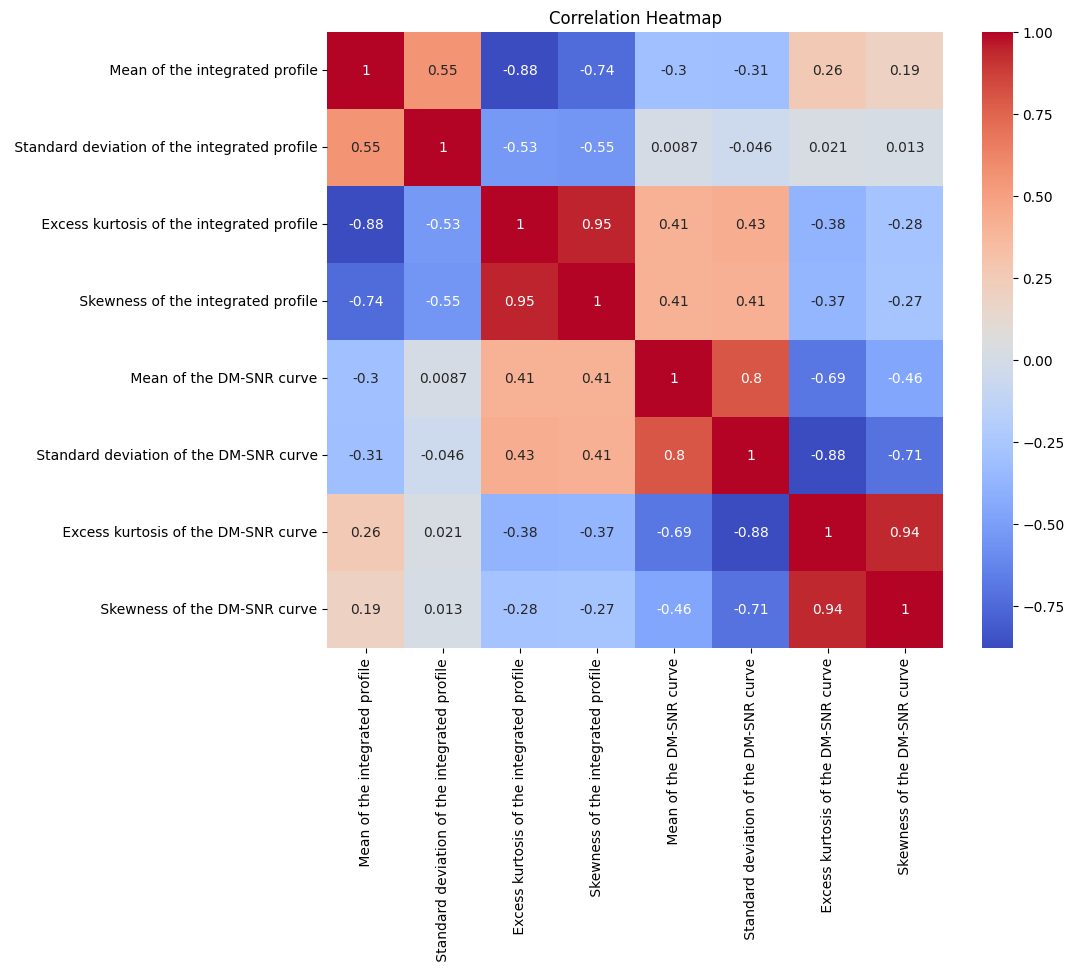

In [13]:
# Heatmap

# 상관관계 계산
correlation_matrix = features.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

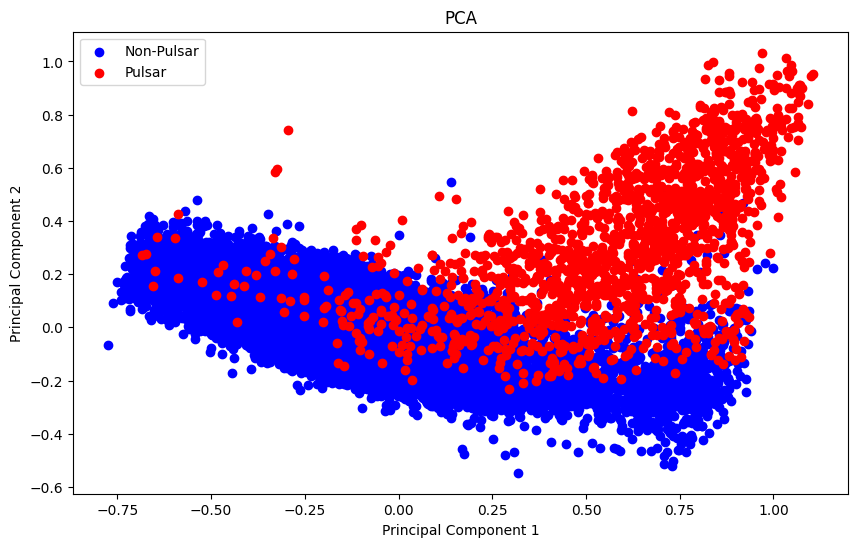

In [14]:
# PCA

# PCA 모델 생성과 적용
pca = PCA(n_components=2)  # 주성분 개수를 2로 설정 (변경 가능)
principal_components = pca.fit_transform(features)

# 새로운 PCA 데이터프레임 생성
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target_class'] = target

# PCA 결과 시각화
plt.figure(figsize=(10, 6))
targets = [0, 1]  
colors = ['blue', 'red']  
labels = ['Non-Pulsar', 'Pulsar'] 
for target, color, label in zip(targets, colors, labels):
    indices_to_keep = pca_df['target_class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color, label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.legend()
plt.show()